In [30]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import random
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

url = 'https://raw.githubusercontent.com/Istiak-Mahmud/CropsPred-Meta-model/main/Final_Crops_recommendation_Dataset.csv'
df = pd.read_csv(url)
df.head()

,N,P,K,temperature,humidity,ph,label
0,93,56,42,23.85754,82.25573,7.385763,Paddy
1,79,43,39,21.66628,80.70961,7.062779,Paddy
2,95,52,36,26.22917,83.83626,5.543360,Paddy
3,67,58,39,25.28272,80.54373,5.453592,Paddy
4,70,36,42,21.84107,80.72886,6.946210,Paddy


In [31]:
df.shape

(3000, 7)

In [32]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'label'], dtype='object')

In [33]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
label          False
dtype: bool

In [34]:
print("Number of various crops: ", len(df['label'].unique()))
print("List of crops: ", df['label'].unique())

Number of various crops:  30
List of crops:  ['Paddy' 'Wheat' 'Potato' 'Tomato' 'Tea' 'mango' 'mungbean' 'jute'
 'lentil' 'maize' 'apple' 'mothbeans' 'banana' 'cotton' 'coffee'
 'watermelon' 'coconut' 'grapes' 'chickpea' 'muskmelon' 'Pumpkin'
 'blackgram' 'pigeonpeas' 'orange' 'Pulses' 'kidneybeans' 'pomegranate'
 'papaya' 'Onion' 'Ginger']


In [35]:
df['label'].value_counts()

Paddy          100
Wheat          100
Onion          100
papaya         100
pomegranate    100
kidneybeans    100
Pulses         100
orange         100
pigeonpeas     100
blackgram      100
Pumpkin        100
muskmelon      100
chickpea       100
grapes         100
coconut        100
watermelon     100
coffee         100
cotton         100
banana         100
mothbeans      100
apple          100
maize          100
lentil         100
jute           100
mungbean       100
mango          100
Tea            100
Tomato         100
Potato         100
Ginger         100
Name: label, dtype: int64

In [36]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,temperature
label,,,,,,
Ginger,45.15,77.40,41.48,88.005019,5.913478,24.055585
Onion,17.52,18.52,30.16,72.121500,6.999718,23.518770
Paddy,39.86,79.92,47.72,82.275352,6.434299,23.719110
Potato,91.65,18.53,92.65,92.336767,6.293546,20.609111
Pulses,17.52,18.52,37.04,82.222873,5.523819,22.660551


In [37]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='Green'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='Blue'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='Gray'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=90)

fig.show()

In [38]:
crop_scatter = df[(df['label']=='Paddy') | 
                  (df['label']=='Wheat') | 
                  (df['label']=='Onion') |
                  (df['label']=='papaya') |
                  (df['label']=='Pomegranate') |
                  (df['label']=='Kidneybeans') |
                  (df['label']=='Pulses') |
                  (df['label']=='Orange')|
                  (df['label']=='Pigeonpeas')|
                  (df['label']=='Blackgram')|
                  (df['label']=='Pumpkin')|
                  (df['label']=='Muskmelon')|
                  (df['label']=='Chickpea')|
                  (df['label']=='Grapes')|
                  (df['label']=='Coconut')|
                  (df['label']=='Watermelon')|
                  (df['label']=='Coffee')|
                  (df['label']=='Cotton')|
                  (df['label']=='Banana')|
                  (df['label']=='Mothbeans')|
                  (df['label']=='Apple')|
                  (df['label']=='Maize')|
                  (df['label']=='Lentil')|
                  (df['label']=='Jute')|
                  (df['label']=='Mugbean')|
                  (df['label']=='Mango')|
                  (df['label']=='Tea')|
                  (df['label']=='Tomato')|
                  (df['label']=='Potato')|
                  (df['label']=='Ginger')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Text(0, 0.5, 'Labels')

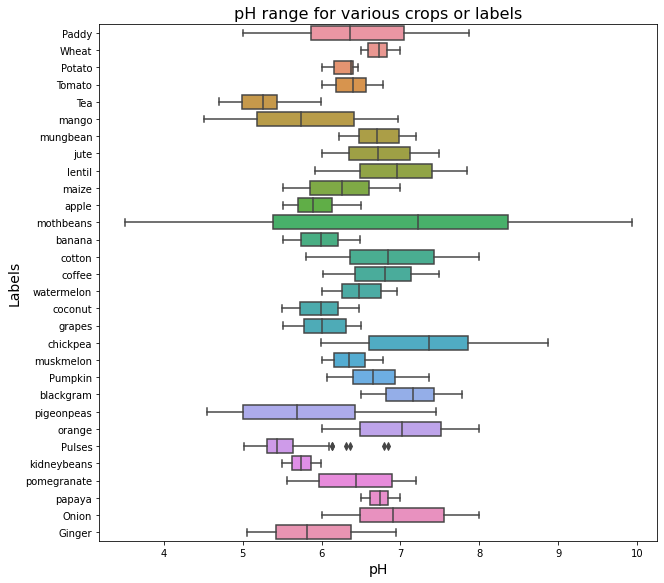

In [39]:
fig, ax = plt.subplots(figsize=(10, 9.5))

boxplot=sns.boxplot(y='label',x='ph',data=df, ax=ax)
sns.set_context("paper", font_scale=0.9)
boxplot.axes.set_title("pH range for various crops or labels", fontsize=16)
boxplot.set_xlabel("pH", fontsize=14)
boxplot.set_ylabel("Labels", fontsize=14)

In [40]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=3, cols=2)

top_N = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last_N = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

top_P = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}

last_P = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}

top_K = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}

last_K = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}

fig.add_trace(
    go.Bar(top_N,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top_N['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last_N,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last_N['x']),
    row=1, col=2
)

fig.add_trace(
    go.Bar(top_P,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top_P['x']),
    
    row=2, col=1
)

fig.add_trace(
    go.Bar(last_P,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last_P['x']),
    row=2, col=2
)

fig.add_trace(
    go.Bar(top_K,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top_K['x']),
    
    row=3, col=1
)

fig.add_trace(
    go.Bar(last_K,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last_K['x']),
    row=3, col=2
)

fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [41]:
X = df.drop(columns=['label'])
y = df['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
print(X_train.shape)

(2400, 6)


In [42]:
#  from sklearn.linear_model import RidgeClassifier
# from sklearn import svm
# from sklearn.linear_model import SGDClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
#  from sklearn.naive_bayes import GaussianNB
#  from sklearn import tree
# import lightgbm as lgb

# models = []
# models.append(('LGBM',lgb.LGBMClassifier()))
# models.append(('Ridge', RidgeClassifier()))
# models.append(('SVR', svm.SVC()))
# models.append(('SGDC', SGDClassifier()))
# models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
# models.append(('GPC', GaussianProcessClassifier()))
# models.append(('BaysNa', GaussianNB()))
# models.append(('Tree', tree.DecisionTreeClassifier()))

# results = []
# names = []
# scoring = 'accuracy'
# for name, model in models:
#   Y_pred = model.fit(X_train, y_train).predict(X_test)
#   print(name)
#   print('Accuracy score: %.2f'
#         % accuracy_score(y_test, Y_pred))

In [45]:
#from sklearn.ensemble import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
estimators = [
    ('Ridge', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('BaysNa', GaussianNB()),
    ('Tree', tree.DecisionTreeClassifier())
]

In [47]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    #final_estimator=SGDClassifier(),
    #final_estimator=LogisticRegression(),
    final_estimator=KNeighborsClassifier(n_neighbors=7),
    #final_estimator=lgb.LGBMClassifier(),
    cv=5
)

In [48]:
clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Ridge',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('BaysNa', GaussianNB()),
                               ('Tree', DecisionTreeClassifier())],
                   final_estimator=KNeighborsClassifier(n_neighbors=7))

In [49]:
y_pred = clf.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred)

0.9566666666666667

In [51]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9942
Test set score: 0.9567


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Ginger       0.94      1.00      0.97        16
       Onion       0.96      0.93      0.94        27
       Paddy       0.80      0.89      0.84        18
      Potato       1.00      1.00      1.00        20
      Pulses       1.00      1.00      1.00        16
     Pumpkin       0.83      0.95      0.89        21
         Tea       1.00      1.00      1.00        20
      Tomato       0.92      0.92      0.92        25
       Wheat       1.00      0.95      0.98        21
       apple       1.00      1.00      1.00        11
      banana       1.00      1.00      1.00        20
   blackgram       0.84      0.91      0.87        23
    chickpea       1.00      1.00      1.00        17
     coconut       0.95      1.00      0.97        18
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        18
        jute       0.92    

In [82]:
# newdata1=clf.predict([[90, 50, 50, 20.879744, 75, 6.5]])
# newdata1

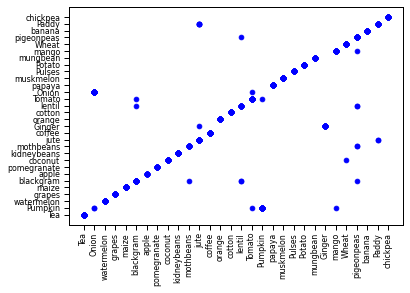

In [54]:
plt.scatter(y_test, 
            y_pred,  
            color='blue')
plt.xticks(rotation=90)
plt.show()

Number of mislabeled points out of a total 600 points : 26


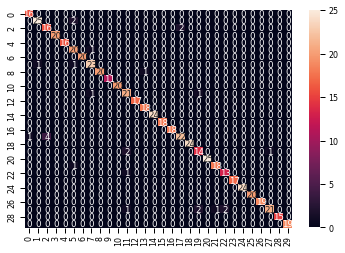

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
print("Number of mislabeled points out of a total %d points : %d"
  % (X_test.shape[0], (y_test != y_pred).sum()))

Text(0, 0.5, 'Error Rate')

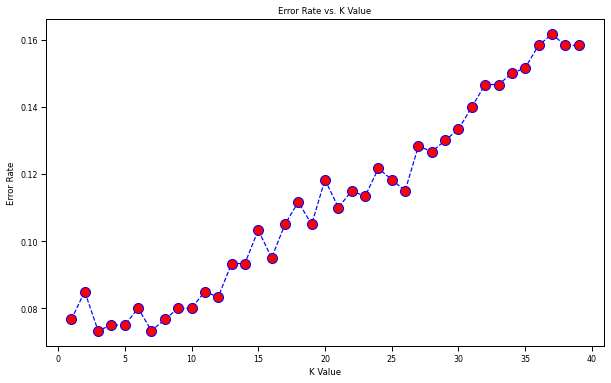

In [56]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

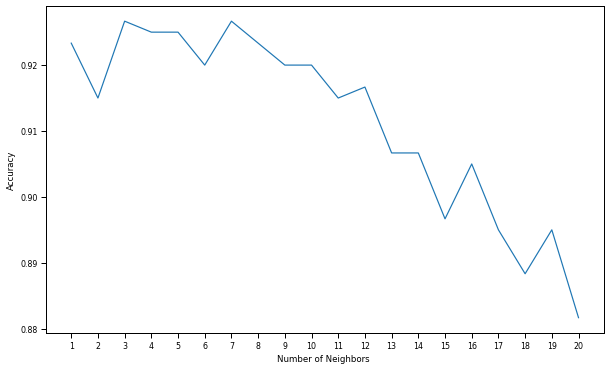

In [57]:
#Hyperparameter Tuning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
mean_acc

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

>5, train: 0.958, test: 0.925
>6, train: 0.948, test: 0.920
>7, train: 0.954, test: 0.927
>8, train: 0.939, test: 0.923
>9, train: 0.942, test: 0.920
>10, train: 0.935, test: 0.920
>11, train: 0.938, test: 0.915
>12, train: 0.932, test: 0.917
>13, train: 0.930, test: 0.907
>14, train: 0.925, test: 0.907
>15, train: 0.926, test: 0.897
>16, train: 0.919, test: 0.905
>17, train: 0.921, test: 0.895
>18, train: 0.918, test: 0.888
>19, train: 0.921, test: 0.895
>20, train: 0.919, test: 0.882
>21, train: 0.915, test: 0.890
>22, train: 0.907, test: 0.885
>23, train: 0.906, test: 0.887
>24, train: 0.905, test: 0.878
>25, train: 0.904, test: 0.882
>26, train: 0.902, test: 0.885
>27, train: 0.902, test: 0.872
>28, train: 0.898, test: 0.873
>29, train: 0.896, test: 0.870
>30, train: 0.892, test: 0.867
>31, train: 0.893, test: 0.860
>32, train: 0.887, test: 0.853
>33, train: 0.891, test: 0.853
>34, train: 0.885, test: 0.850
>35, train: 0.884, test: 0.848
>36, train: 0.877, test: 0.842
>37, train: 0

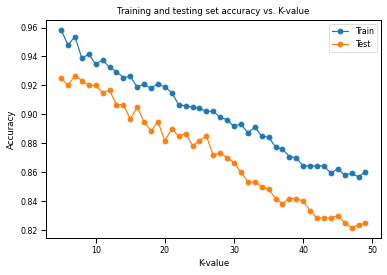

In [58]:
# evaluate knn performance on train and test sets with different numbers of neighbors

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(5, 50)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.title('Training and testing set accuracy vs. K-value')
pyplot.xlabel('K-value')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

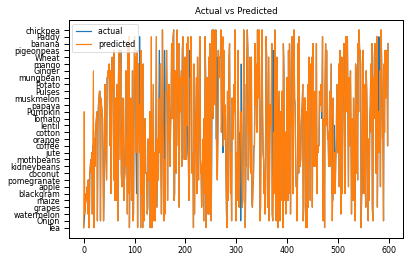

In [59]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b

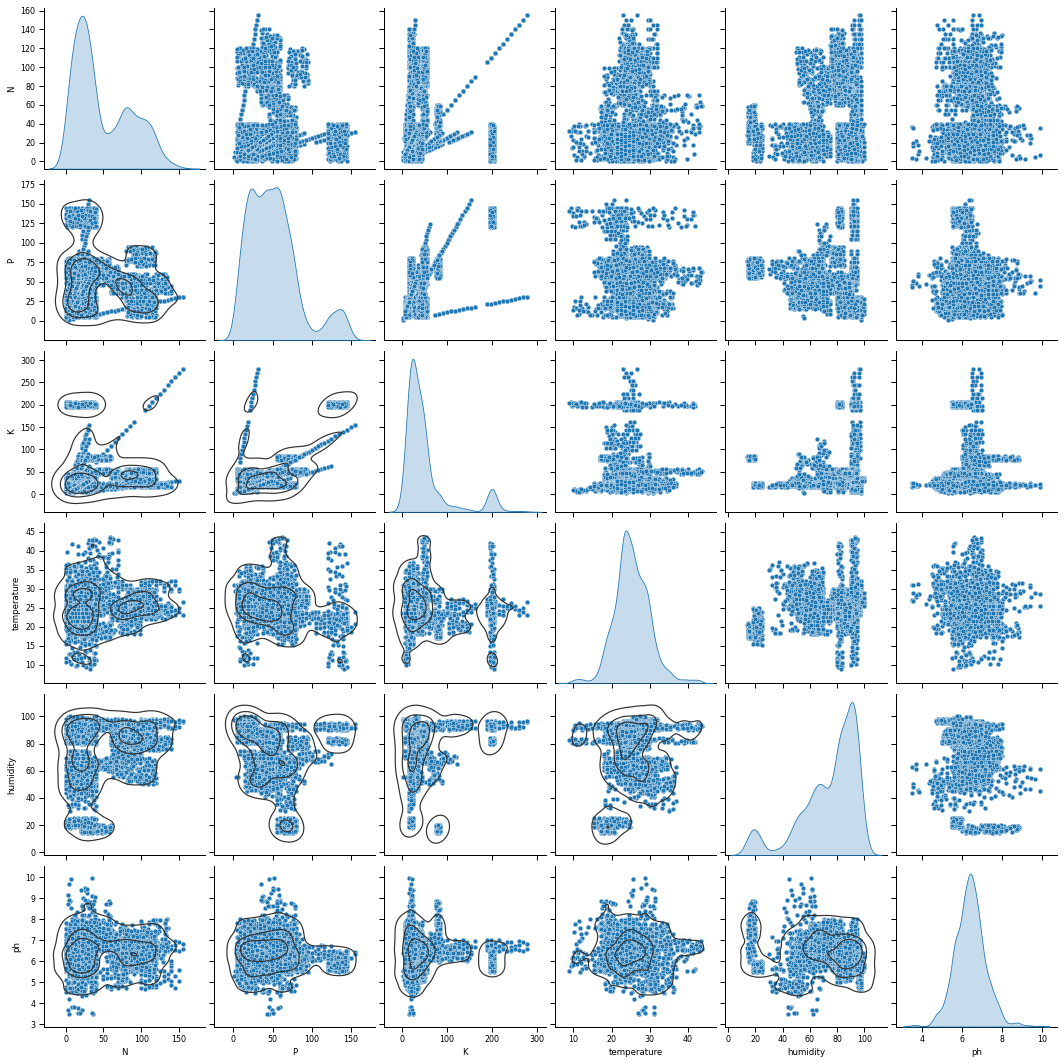

In [60]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

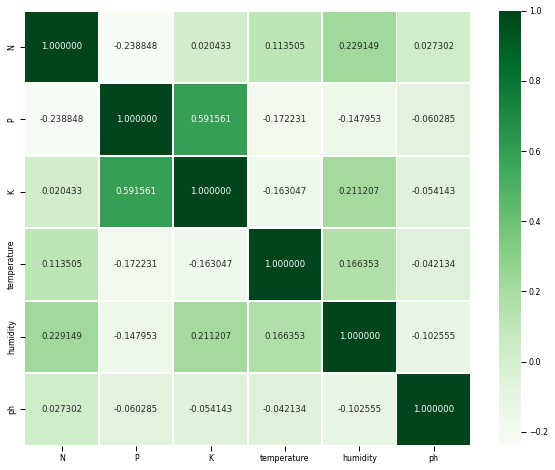

In [61]:
correlation_mat = df.corr()
correlation_mat
plt.figure(figsize=(10,8))
#sns.color_palette("Blues", as_cmap=True)
# fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(correlation_mat,cmap="Greens", linewidths=1,annot=True, fmt="f")
sns.set_context("paper", font_scale=1.3)

In [62]:
# import pickle
# with open('crop_prediction.pickle','wb') as f:
#   pickle.dump(KNeighborsClassifier,f)

In [63]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#   f.write(json.dumps(columns))

**Gaussian Naive Bayes model implementation**

M. Kalimuthu, P. Vaishnavi and M. Kishore, "Crop Prediction using Machine Learning," 2020 Third International Conference on Smart Systems and Inventive Technology (ICSSIT), 2020, pp. 926-932, doi: 10.1109/ICSSIT48917.2020.9214190.


*   As this paperwork have not any reference datasets.
*   We did the same model using a Kaggle dataset.
*   This paperwork contains four parameters - Temperature, Humidity, pH and Rainfall.

In [64]:
url1 ='https://raw.githubusercontent.com/Istiak-Mahmud/CropsPred-Meta-model/main/Crop_recommendation_Kaggle.csv'
# data = pd.read_csv(path_NB)
data = pd.read_csv(url1)
data.head()

# Dataset_Ref - https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset?select=Crop_recommendation.csv

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [65]:
# data = df
data.drop('N', inplace=True, axis=1)
data.drop('P', inplace=True, axis=1)
data.drop('K', inplace=True, axis=1)
data

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee
2196,27.417112,56.636362,6.086922,127.924610,coffee
2197,24.131797,67.225123,6.362608,173.322839,coffee
2198,26.272418,52.127394,6.758793,127.175293,coffee


In [66]:
y_NB1 = data['label']
x_NB1 = data.drop(['label'], 
              axis = 1)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(x_NB1,
                                                 y_NB1,
                                                 test_size = 0.2,
                                                 random_state = 5)

In [68]:
model_NB1 = []
model_NB1.append(('BaysNa', GaussianNB()))

In [69]:
scoring = 'accuracy'
for name, model_NB1 in model_NB1:
  Y_pred = model_NB1.fit(X_train, Y_train).predict(X_test)
  print(name)
  print('Accuracy score: %.2f'
        % accuracy_score(Y_test, Y_pred))

BaysNa
Accuracy score: 0.95


In [70]:
print('Training set score: {:.4f}'.format(model_NB1.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(model_NB1.score(X_test, Y_test)))

Training set score: 0.9568
Test set score: 0.9545


In [71]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_test, Y_pred, average='macro')

(0.9547069890244825, 0.9568227624976057, 0.9536147197163403, None)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       apple       0.92      0.96      0.94        24
      banana       0.94      1.00      0.97        15
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        20
      coffee       0.89      0.96      0.92        25
      cotton       0.92      0.85      0.88        13
      grapes       0.89      1.00      0.94        17
        jute       0.88      1.00      0.94        15
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.95      1.00      0.97        18
       maize       0.96      0.93      0.94        27
       mango       0.90      1.00      0.95        18
   mothbeans       1.00      0.91      0.95        22
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      0.83      0.90        23
      papaya       0.91    

**Support Vector Machine implementation**

Dash, Ritesh, Dillip Ku Dash, and G. C. Biswal. "Classification of crop based on macronutrients and weather data using machine learning techniques." Results in Engineering 9 (2021): 100203.

In [73]:
data2 = pd.read_csv(url)
data2.head()

,N,P,K,temperature,humidity,ph,label
0,93,56,42,23.85754,82.25573,7.385763,Paddy
1,79,43,39,21.66628,80.70961,7.062779,Paddy
2,95,52,36,26.22917,83.83626,5.543360,Paddy
3,67,58,39,25.28272,80.54373,5.453592,Paddy
4,70,36,42,21.84107,80.72886,6.946210,Paddy


In [74]:
a = data2.drop('label', axis=1)
b = data2['label']

In [75]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [76]:
from sklearn import svm
model = svm.SVC()
model.fit(a_train, b_train)

b_pred=model.predict(a_test)

accuracy=accuracy_score(b_pred, b_test)
print('SVM Model accuracy score: {0:0.4f}'.format(accuracy_score(b_test, b_pred)))

SVM Model accuracy score: 0.8567


In [77]:
print('Training set score: {:.4f}'.format(model.score(a_train, b_train)))
print('Test set score: {:.4f}'.format(model.score(a_test, b_test)))

Training set score: 0.8895
Test set score: 0.8567


In [84]:
print(classification_report(b_test, b_pred))

              precision    recall  f1-score   support

      Ginger       0.61      0.93      0.74        30
       Onion       0.85      1.00      0.92        34
       Paddy       0.39      0.71      0.50        24
      Potato       1.00      0.93      0.97        30
      Pulses       0.89      0.61      0.72        28
     Pumpkin       0.78      0.76      0.77        33
         Tea       1.00      0.94      0.97        33
      Tomato       0.94      0.47      0.62        32
       Wheat       1.00      1.00      1.00        27
       apple       1.00      1.00      1.00        39
      banana       1.00      1.00      1.00        36
   blackgram       0.61      0.83      0.70        23
    chickpea       1.00      1.00      1.00        24
     coconut       0.97      1.00      0.98        30
      coffee       0.94      1.00      0.97        31
      cotton       0.94      1.00      0.97        30
      grapes       1.00      1.00      1.00        28
        jute       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Result analysis**

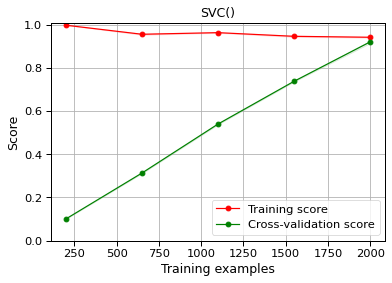

In [79]:
std = StandardScaler()
a = std.fit_transform(data2[['N','P','K','temperature','humidity','ph']])
b = data2['label']

title = model
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
plt = plot_learning_curve(model, title, a, b, cv=3, ylim=(0.0, 1.01), n_jobs=1)
plt.show()

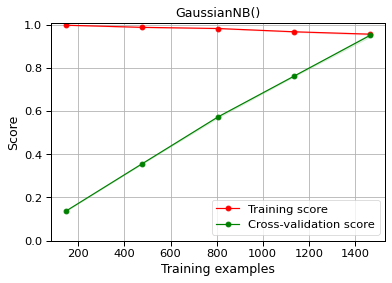

In [80]:
std = StandardScaler()
a = std.fit_transform(data[['temperature','humidity','ph','rainfall']])
b = data['label']

title = model_NB1
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
plt = plot_learning_curve(model_NB1, title, a, b, cv=3, ylim=(0.0, 1.01), n_jobs=1)
plt.show()

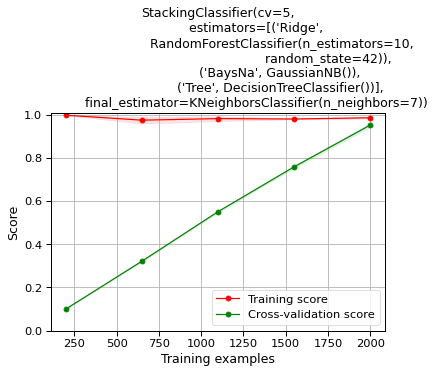

In [81]:
std = StandardScaler()
a = std.fit_transform(df[['N','P','K','temperature','humidity','ph']])
b = df['label']

title = clf
cv = ShuffleSplit(n_splits=5, test_size=0.4, random_state=0)
plt3 = plot_learning_curve(clf, title, a, b, cv=3, ylim=(0.0, 1.01), n_jobs=1)
plt3.show()